In [1]:
print("Hello, world")

Hello, world


## Init data for linear regression

In [104]:
# Imports
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
np.random.seed(seed=42)

In [348]:
def f(x):
    return x * 2

In [349]:
def noise(x):
    return np.random.randn(x.shape[0]) * 0.2

In [350]:
input_x = np.random.uniform(0, 1, 20)

In [352]:
input_x_with_noise = f(input_x) + noise(input_x)

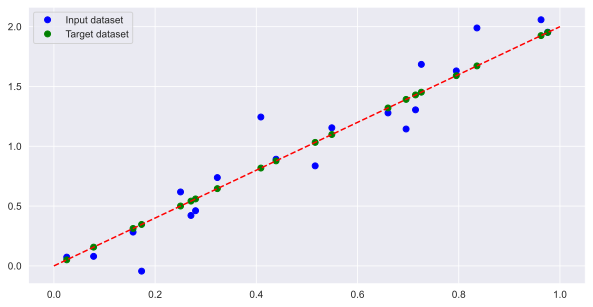

In [357]:
plt.figure(figsize=(10, 5))
plt.plot(input_x, input_x_with_noise , 'bo', label="Input dataset")
plt.plot(input_x, f(input_x) , 'go', label="Target dataset")
plt.plot((0,1), (f(0), f(1)), 'r--')
plt.legend()
plt.show()

In [358]:
def loss(pred, t):
    return np.mean((pred - t)**2)

In [359]:
ideal_w_check = np.linspace(0, 4, 100)
ideal_w_loss = np.vectorize(lambda w: loss(w*input_x, input_x_with_noise))(ideal_w_check)
w_loss_min_idx = np.argmin(ideal_w_loss)

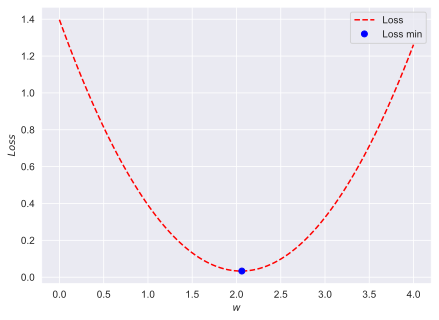

In [360]:
plt.figure(figsize=(7,5))
plt.plot(ideal_w_check, ideal_w_loss, 'r--', label="Loss")
plt.plot((ideal_w_check[w_loss_min_idx]), (ideal_w_loss[w_loss_min_idx]), 'bo', label="Loss min")
plt.xlabel("$w$")
plt.ylabel("$Loss$")
plt.legend()
plt.show()

## Gradient descent

In [361]:
def gradient(x, w, t):
    return 2 * x * (x*w - t)

In [362]:
def delta(w_k, x, t, learning_rate=0.9):
    return learning_rate * np.mean(gradient(w_k, x, t))

In [363]:
w_grad = np.random.rand()
iterations = 6

In [364]:
grad_w_loss = [(w_grad, loss(w_grad*input_x, input_x_with_noise))]
for i in range(iterations):
    dw = delta(w_grad, input_x, input_x_with_noise)
    w_grad = w_grad - dw
    grad_w_loss.append((w_grad, loss(w_grad*input_x, input_x_with_noise)))

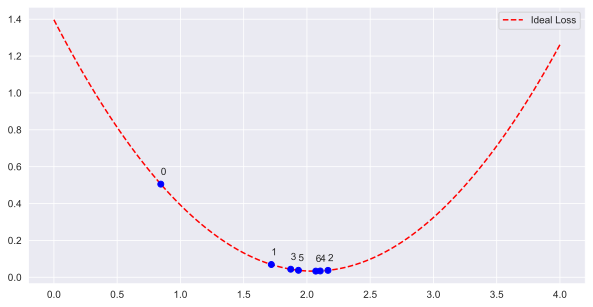

In [371]:
plt.figure(figsize=(10, 5))
plt.plot(ideal_w_check, ideal_w_loss, 'r--', label="Ideal Loss")
for i in range(len(grad_w_loss)):
    plt.plot(grad_w_loss[i][0], grad_w_loss[i][1], 'bo')
    plt.text(grad_w_loss[i][0], grad_w_loss[i][1]+0.05, str(i))
plt.legend()
plt.show()

In [374]:
the_best_grad_w = grad_w_loss[len(grad_w_loss)-1][0]
the_best_grad_w

2.0698854651444645

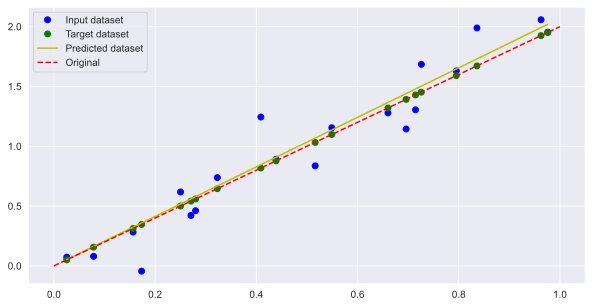

In [381]:
plt.figure(figsize=(10, 5))
plt.plot(input_x, input_x_with_noise , 'bo', label="Input dataset")
plt.plot(input_x, f(input_x) , 'go', label="Target dataset")
plt.plot(input_x, the_best_grad_w*input_x , 'y', label="Predicted dataset")
plt.plot((0,1), (f(0), f(1)), 'r--', label="Original")
plt.legend()
plt.show()